# <a name="0">K means - EM</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

#data_path = ''  #the path where you downloaded the data
df = pd.read_csv('countries of the world.csv',decimal=',')

print('The shape of the dataset is:', df.shape)
df.head()

The shape of the dataset is: (227, 20)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Null values need to be hundled**

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


**No datatypes fixing is needed**

In [6]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

**No duplicated rows**

In [7]:
df.duplicated().sum()

0

**Check for outliers (Visually)**</P>
**Most of features have considrable amount of oulires**

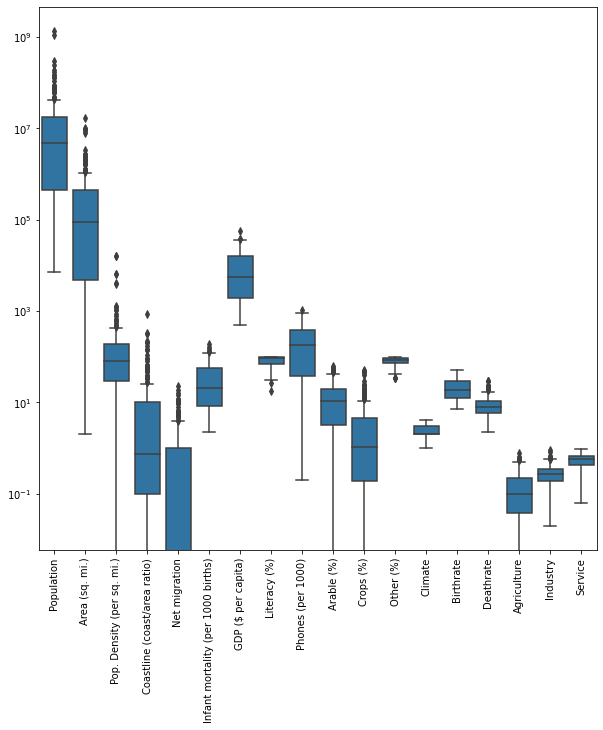

In [8]:
plt.figure(figsize=(10,10))
base = sb.color_palette()[0]
sb.boxplot(data = df,color=base)
plt.xticks(rotation = 90)
plt.yscale("log")

**Corelation between features**

<AxesSubplot:>

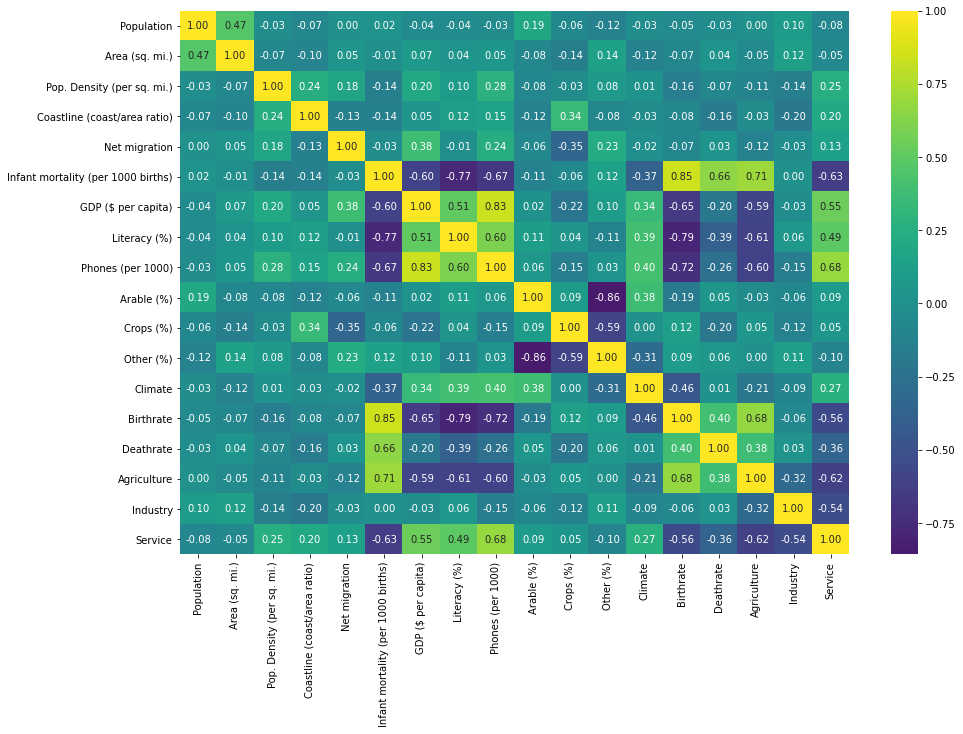

In [9]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0)

In [10]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

**All Features can be considered extremely right skewed ignoring outliers except for Climate, Indusrty, Service, Other and Literacy(%)**</P>
**It requires some transoformation to fit clustring algorithms.**

(array([  1.,   2.,  10.,  10.,  12.,   9.,  11.,  18.,  28., 108.]),
 array([ 17.6 ,  25.84,  34.08,  42.32,  50.56,  58.8 ,  67.04,  75.28,
         83.52,  91.76, 100.  ]),
 <BarContainer object of 10 artists>)

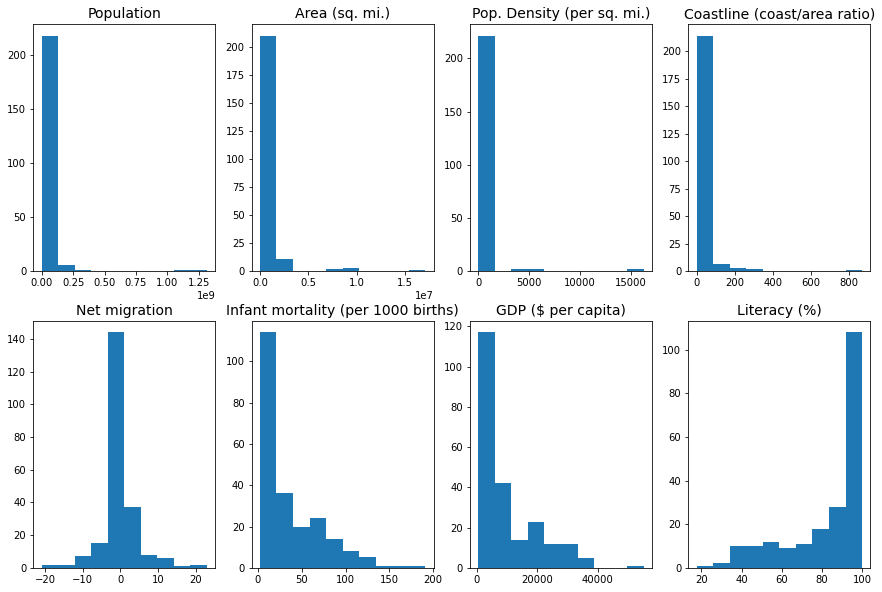

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
plt.title('Population',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Population')
plt.subplot(2,4,2)
plt.title('Area (sq. mi.)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Area (sq. mi.)')
plt.subplot(2,4,3)
plt.title('Pop. Density (per sq. mi.)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Pop. Density (per sq. mi.)')
plt.subplot(2,4,4)
plt.title('Coastline (coast/area ratio)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Coastline (coast/area ratio)')
plt.subplot(2,4,5)
plt.title('Net migration',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Net migration')
plt.subplot(2,4,6)
plt.title('Infant mortality (per 1000 births)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Infant mortality (per 1000 births)')
plt.subplot(2,4,7)
plt.title('GDP ($ per capita)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'GDP ($ per capita)')
plt.subplot(2,4,8)
plt.title('Literacy (%)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Literacy (%)')

(array([89., 46., 27., 16., 15., 10.,  3.,  3.,  2.,  1.]),
 array([0.    , 0.0769, 0.1538, 0.2307, 0.3076, 0.3845, 0.4614, 0.5383,
        0.6152, 0.6921, 0.769 ]),
 <BarContainer object of 10 artists>)

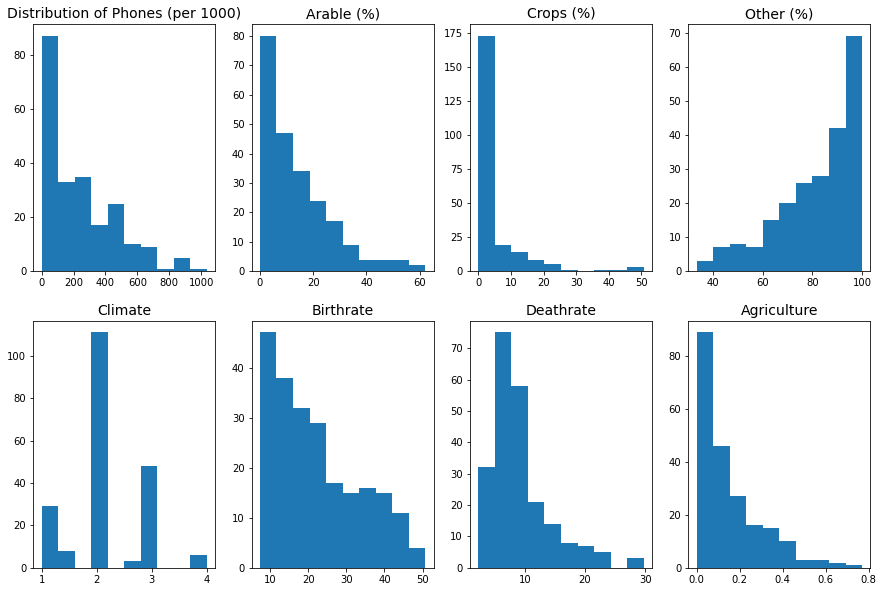

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
plt.title('Distribution of Phones (per 1000)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Phones (per 1000)')
plt.subplot(2,4,2)
plt.title('Arable (%)',fontdict={'fontsize':14})
plt.hist(data = df, x = 'Arable (%)')
plt.subplot(2,4,3)
plt.title('Crops (%)',fontdict={'fontsize':14})          
plt.hist(data = df, x = 'Crops (%)')
plt.subplot(2,4,4)
plt.title('Other (%)',fontdict={'fontsize':14})          
plt.hist(data = df, x = 'Other (%)')
plt.subplot(2,4,5)
plt.title('Climate',fontdict={'fontsize':14})          
plt.hist(data = df, x = 'Climate')
plt.subplot(2,4,6)
plt.title('Birthrate',fontdict={'fontsize':14})          
plt.hist(data = df, x = 'Birthrate')
plt.subplot(2,4,7)
plt.title('Deathrate',fontdict={'fontsize':14})          
plt.hist(data = df, x = 'Deathrate')
plt.subplot(2,4,8)
plt.title('Agriculture',fontdict={'fontsize':14})          
plt.hist(data = df, x = 'Agriculture')

(array([ 1.,  3., 10., 34., 24., 48., 46., 26., 12.,  8.]),
 array([0.062 , 0.1512, 0.2404, 0.3296, 0.4188, 0.508 , 0.5972, 0.6864,
        0.7756, 0.8648, 0.954 ]),
 <BarContainer object of 10 artists>)

<Figure size 1080x720 with 0 Axes>

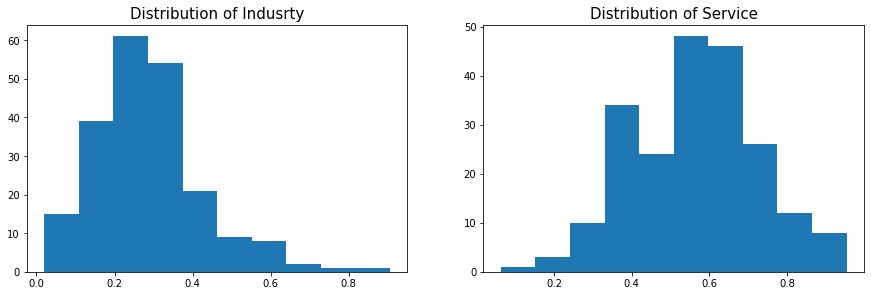

In [13]:
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Distribution of Indusrty',fontdict={'fontsize':15})
plt.hist(data = df, x = 'Industry')
plt.subplot(2,2,2)
plt.title('Distribution of Service',fontdict={'fontsize':15})
plt.hist(data = df, x = 'Service')

**We can perform LabelEncoding to Reegion column**

In [14]:
df.Region.value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

In [15]:
df.Climate.value_counts()

2.0    111
3.0     48
1.0     29
1.5      8
4.0      6
2.5      3
Name: Climate, dtype: int64

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Null Values Which must be replaced with mean<br>
2- Data Types issue already solved by providing decimal=',' in read_csv funcition        <br>
3-         <br>

In [16]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**1-Fill NAN values with mean**

In [17]:
#solution
# Fill NAN values with mean
df_copy.fillna(df.mean(),inplace=True)

In [18]:
#Test
df_copy.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Second issue**

In [19]:
#solution


In [20]:
#test 
df_copy.head(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.000000,46.60,20.34,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.000000,15.11,5.22,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.000000,17.14,4.61,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.000000,22.46,3.27,0.150844,0.282711,0.565283
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.000000,8.71,6.25,0.150844,0.282711,0.565283
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,2.139024,45.11,24.20,0.096000,0.658000,0.246000
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.000000,14.17,5.34,0.040000,0.180000,0.780000
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.000000,16.93,5.37,0.038000,0.220000,0.743000
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.000000,16.73,7.55,0.095000,0.358000,0.547000
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.000000,12.07,8.23,0.239000,0.343000,0.418000


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

**First of all We need to Label-Encode Counrty and Region Columns**

In [21]:
from sklearn import preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder
df_copy[['Country','Region']] = df_copy[['Country','Region']].apply(LabelEncoder().fit_transform)

In [23]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,3,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283
4,4,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283


**Using RobustScalar techinique for Transformation and scaling for dataset features**

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
# Why I decided to use RobustScalar?
# Becuase it dose not affected by exsistence of outliers. QuantileTransformer and PowerTransformer are both available 
# choices that can achieve this purpose because it generate uniform or gaussian distribution but I tried both techniques
#and get bad performance on the dataset when using EM either Kmeans algorithms. 
pt = RobustScaler()
df_scaled = pt.fit_transform(df_copy)                       ## Fit the RobustScaler on training data

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
- Number of clusters


### *Number of clusters*
Use elbow method to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [25]:
#training
#import k means
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0,init='random')
pred = kmeans.fit_predict(df_scaled)

In [26]:
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled,pred)*100

82.33570327737627

**Elbow Method**

Text(0, 0.5, 'Inertia')

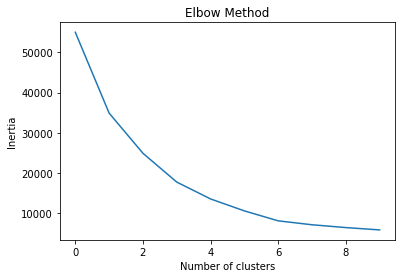

In [27]:
from sklearn.cluster import KMeans
# initialize seed 
seed = 10
elbow = []
# Calculate the Inertia of every number of Cluster and plot graph
for k in range(1,11):
    # Call Kmeans 
    k_means = KMeans(n_clusters = k , random_state= seed)
    # Compute cluster centers and predict cluster index for each sample
    res = k_means.fit(df_scaled)
    # get the Sum of squared distances of samples to their closest cluster center which is called inertia 
    inertia = k_means.inertia_
    # append in the list
    elbow.append(inertia)

# Create series 
elbow_df = pd.Series(elbow)
# Set Title
ax = elbow_df.plot(title = 'Elbow Method')
# set xlabel
ax.set_xlabel('Number of clusters')
# set ylabel
ax.set_ylabel('Inertia')

**The optimum number of clusters is 2 as found from Elbow Method**

In [28]:
#import EM

In [29]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0)
pred_EM = gm.fit_predict(df_scaled)

In [30]:
silhouette_score(df_scaled,pred_EM)*100

86.48184291684268

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

## PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

In [32]:
kmeans = KMeans(n_clusters=2, random_state=0)
pred_pca_km = kmeans.fit_predict(reduced_data)

In [33]:
silhouette_score(reduced_data,pred_pca_km)*100

93.71748418075481

In [34]:
gm = GaussianMixture(n_components=2, random_state=0)
pred_pca_gm = gm.fit_predict(reduced_data)

In [35]:
silhouette_score(reduced_data,pred_pca_gm)*100

93.71748418075481

## gap statistics

In [36]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)

In [37]:
n,resultsdf = optimalK(df_scaled, nrefs=3, maxClusters=15)

<AxesSubplot:>

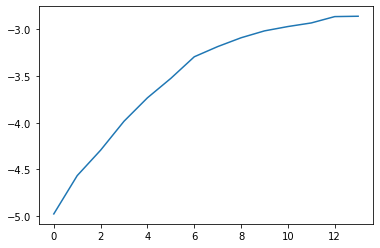

In [38]:
resultsdf['gap'].plot()

# Conclusion
## All methods verify the result of choosing 2 clusters as the optimum number of clusters.
**Also with that choice for n_cluster hyperparameter both models EM & K-Means achieve the best performance**